In [64]:
# Load Data
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sleep = pd.read_excel("2015SleepinAmericaPollSleepandPainRawDataExcel.xlsx")

In [41]:
sleep.keys()

Index(['CaseID', 'weight', 'tm_start', 'tm_finish', 'duration', 'QFLAG',
       'XSPANISH', 'XPRIMELAN', 'DeviceType', 'DeviceType2',
       ...
       'PPSTATEN', 'PPT01', 'PPT25', 'PPT612', 'PPT1317', 'PPT18OV',
       'PPCHILDHH', 'PPWORK', 'PPWORK2', 'PPNET'],
      dtype='object', length=191)

In [46]:
# average sleep hours per day
sleep['avg_sleep'] = (sleep.DOV_WEEKTIME/ 60 * 5 + sleep.DOV_WEEKEND / 60 * 2)/ 7
# average actual sleep per day
sleep['avg_actual_sleep'] = (sleep.DOV_TOTALWEEK/ 60 * 5 + sleep.DOV_TOTALWEEKEND / 60 * 2)/ 7
# Define sleep efficiency as average actual sleep per day/average sleep hours per day
sleep['sleep_efficiency'] = sleep.avg_actual_sleep/sleep.avg_sleep

Sleep efficiency: the percentage of time spent asleep while in bed. (citation)

In [81]:
# Sleep Efficiency > 1
np.sum(sleep.sleep_efficiency > 1)
# Average Sleep efficiency
np.mean(sleep.sleep_efficiency)

# Data with sleep efficiency <= 1
sleep_eff = sleep.loc[sleep.sleep_efficiency <= 1]

In [ ]:
sleep_eff.Q10_a.groupby(sleep_eff.Q10_a)

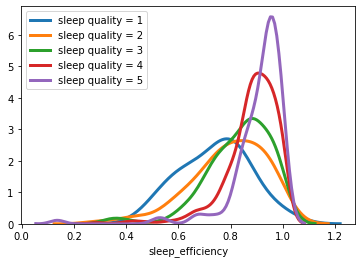

In [95]:
for i in range(1,6): 
    sns.distplot(sleep_eff.sleep_efficiency.loc[sleep_eff.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.legend()

In [98]:
# Number of people with sleeping efficiency < 0.8
sleep.loc[sleep.sleep_efficiency < 0.8].shape

(232, 194)

                            OLS Regression Results                            
Dep. Variable:                  Q10_a   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     57.14
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           9.14e-14
Time:                        11:24:39   Log-Likelihood:                -1326.0
No. Observations:                1003   AIC:                             2656.
Df Residuals:                    1001   BIC:                             2666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.3448      0.160  

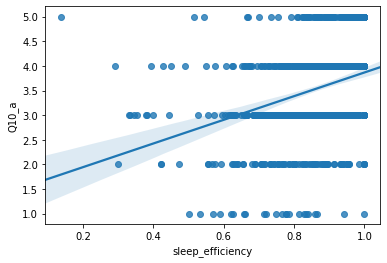

In [78]:
sleep_hours_lr = smf.ols(formula = 'Q10_a ~ sleep_efficiency', data = sleep).fit()
print(sleep_hours_lr.summary())
#sleep_eff = sleep.loc[sleep.sleep_efficiency <= 1]
#sns.regplot(sleep_eff.sleep_efficiency, sleep_eff.Q10_a)

In [37]:
help(smf.ols.fit())

AttributeError: 'function' object has no attribute 'fit'

SyntaxError: invalid syntax (<ipython-input-2-1fe4d756f816>, line 20)